<a href="https://colab.research.google.com/github/zhangminxi-bit/ECON3916/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fredapi

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

fred = Fred(api_key='')

In [6]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [7]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


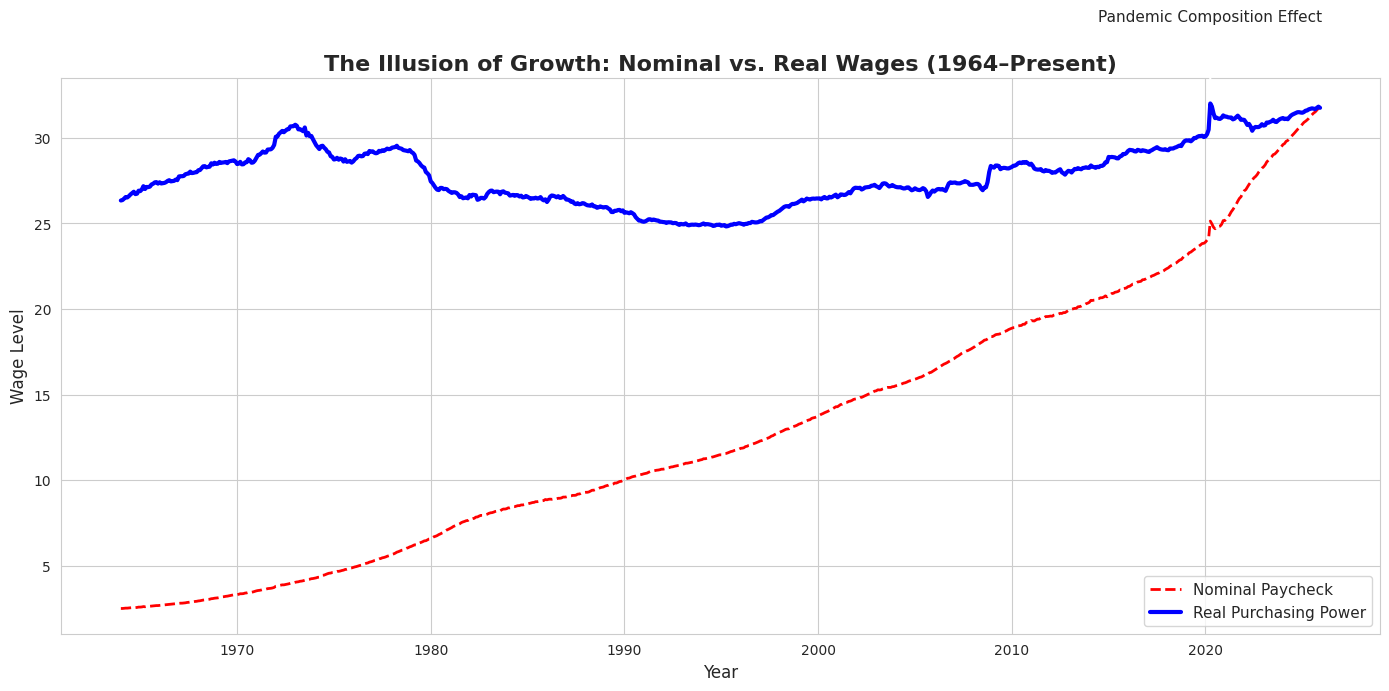

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set professional theme
sns.set_style("whitegrid")

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot nominal and real wages
ax.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Paycheck"
)

ax.plot(
    df.index,
    df["Real_Wage"],
    color="blue",
    linewidth=3,
    label="Real Purchasing Power"
)

# Title and labels
ax.set_title(
    "The Illusion of Growth: Nominal vs. Real Wages (1964–Present)",
    fontsize=16,
    fontweight="bold"
)

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Wage Level", fontsize=12)

# Identify the 2020 spike in real wages
real_2020 = df.loc[df.index.year == 2020, "Real_Wage"]
peak_date = real_2020.idxmax()
peak_value = real_2020.max()

# Annotation
ax.annotate(
    "Pandemic Composition Effect",
    xy=(peak_date, peak_value),
    xytext=(peak_date, peak_value * 1.15),
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=11,
    ha="center"
)

# Legend
ax.legend(fontsize=11)

# Tight layout for clean spacing
plt.tight_layout()

plt.show()


KeyError: Timestamp('2020-12-01 00:00:00')

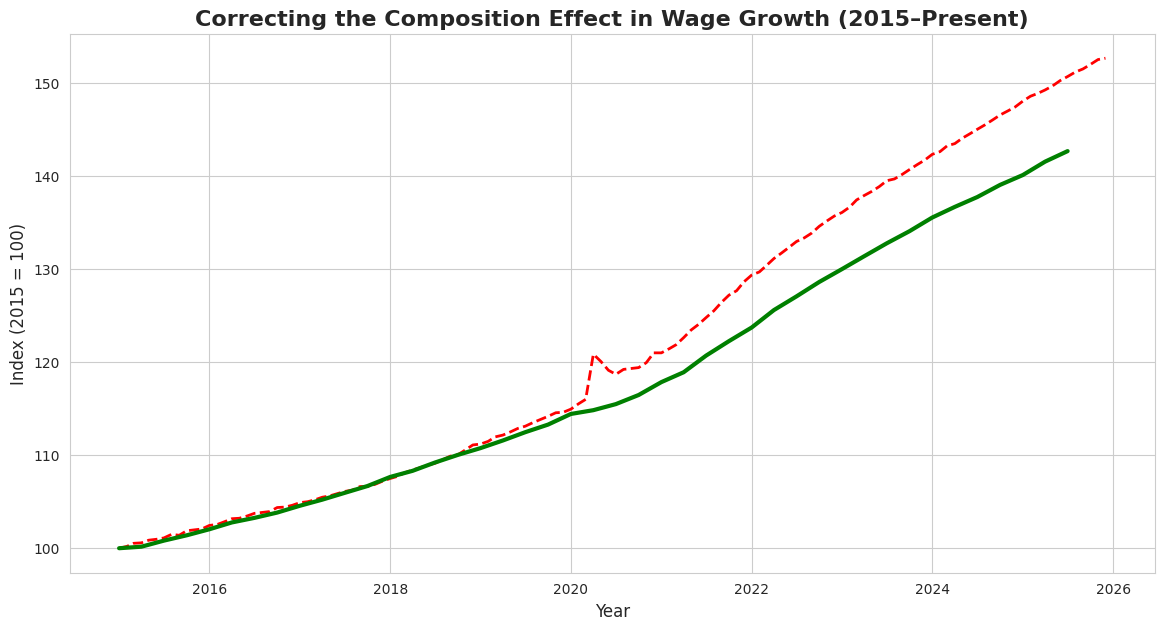

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch Employment Cost Index (ECI) from FRED
eci = fred.get_series("ECIWAG")

# Ensure datetime index
eci.index = pd.to_datetime(eci.index)

# Filter both series from 2015 onward
wages_2015 = wages[wages.index >= "2015-01-01"]
eci_2015 = eci[eci.index >= "2015-01-01"]

# Rebase both series to 100
wages_rebased = (wages_2015 / wages_2015.iloc[0]) * 100
eci_rebased = (eci_2015 / eci_2015.iloc[0]) * 100

# Set professional theme
sns.set_style("whitegrid")

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot series
ax.plot(
    wages_rebased.index,
    wages_rebased,
    linestyle="--",
    color="red",
    linewidth=2,
    label="Standard Average – Biased"
)

ax.plot(
    eci_rebased.index,
    eci_rebased,
    color="green",
    linewidth=3,
    label="ECI – Fixed Composition"
)

# Title and labels
ax.set_title(
    "Correcting the Composition Effect in Wage Growth (2015–Present)",
    fontsize=16,
    fontweight="bold"
)

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Index (2015 = 100)", fontsize=12)

# Identify 2020 divergence
w_2020 = wages_rebased[wages_rebased.index.year == 2020]
eci_2020 = eci_rebased[eci_rebased.index.year == 2020]

w_peak_date = w_2020.idxmax()
w_peak_value = w_2020.max()

eci_value_2020 = eci_2020.loc[w_peak_date]

# Annotation
ax.annotate(
    "Artificial Spike\n(Composition Effect)",
    xy=(w_peak_date, w_peak_value),
    xytext=(w_peak_date, w_peak_value + 6),
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=11,
    ha="center",
    color="red"
)

ax.annotate(
    "Stable Growth\n(Fixed Composition)",
    xy=(w_peak_date, eci_value_2020),
    xytext=(w_peak_date, eci_value_2020 - 6),
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=11,
    ha="center",
    color="green"
)

# Legend
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()
